## Initialization

In [2]:
## To start using the package, only need to import the DataOutput module
from output_dataset import DataOutput as qp

In [3]:
## Load example data
from qcodes import initialise_or_create_database_at
db_init = initialise_or_create_database_at('_qcodes_dataset.db')

# Extracting, formatting and plotting data

## Auto-plotting & variable formatting

To start showing data, load an xarray dataset or qcodes dataset into a DataOutput object and run show():

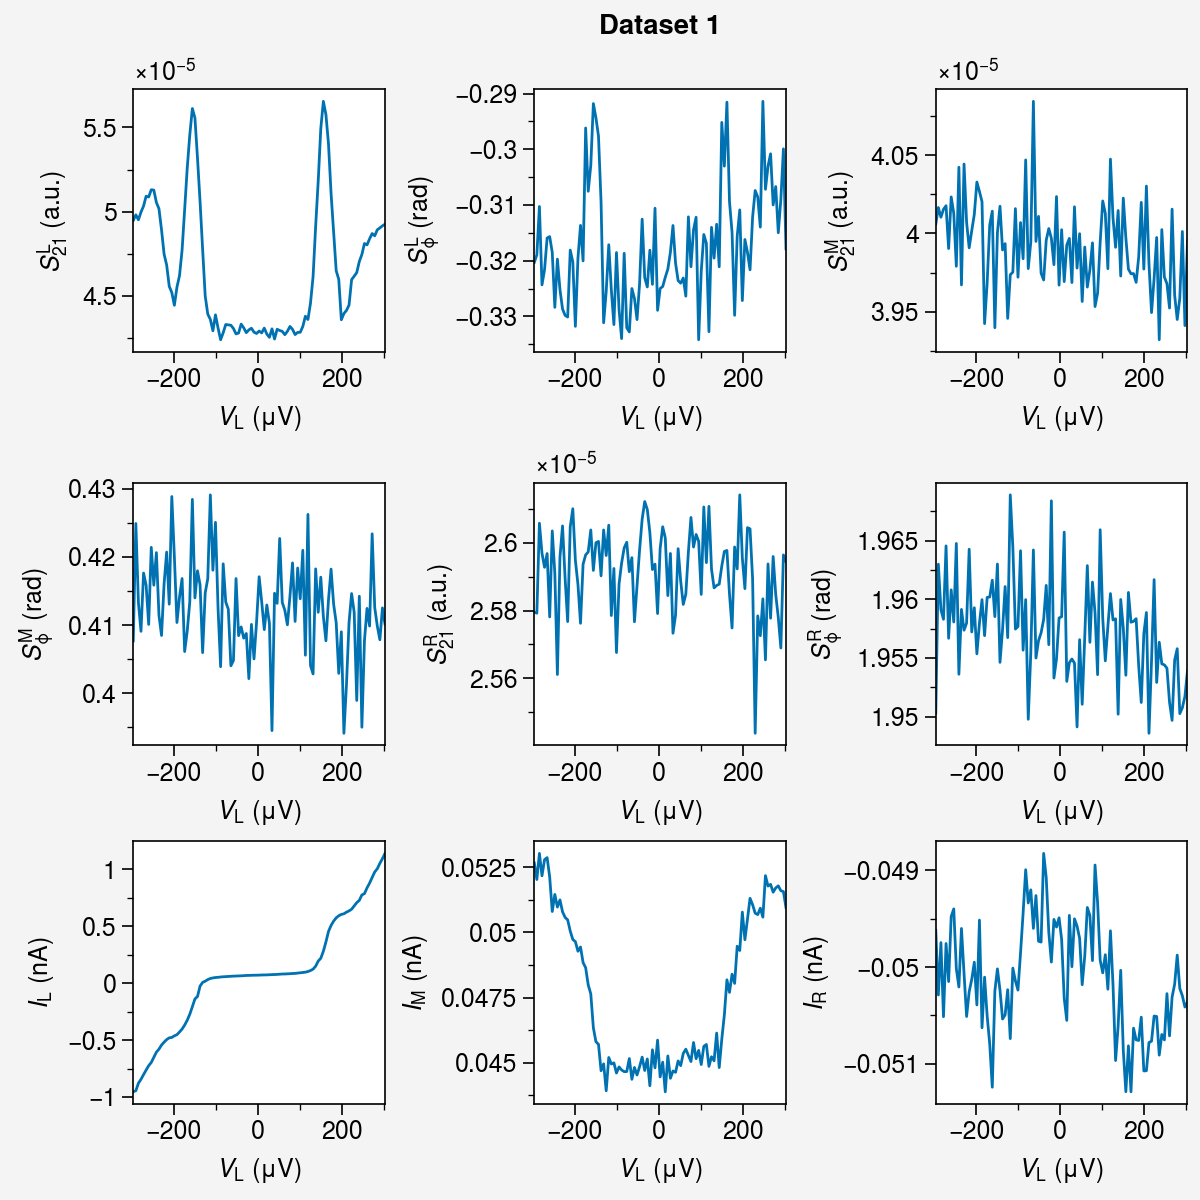

In [4]:
data = qp.DataOutput(1) ## Can load a QCodes or an xarray dataset
data.show()

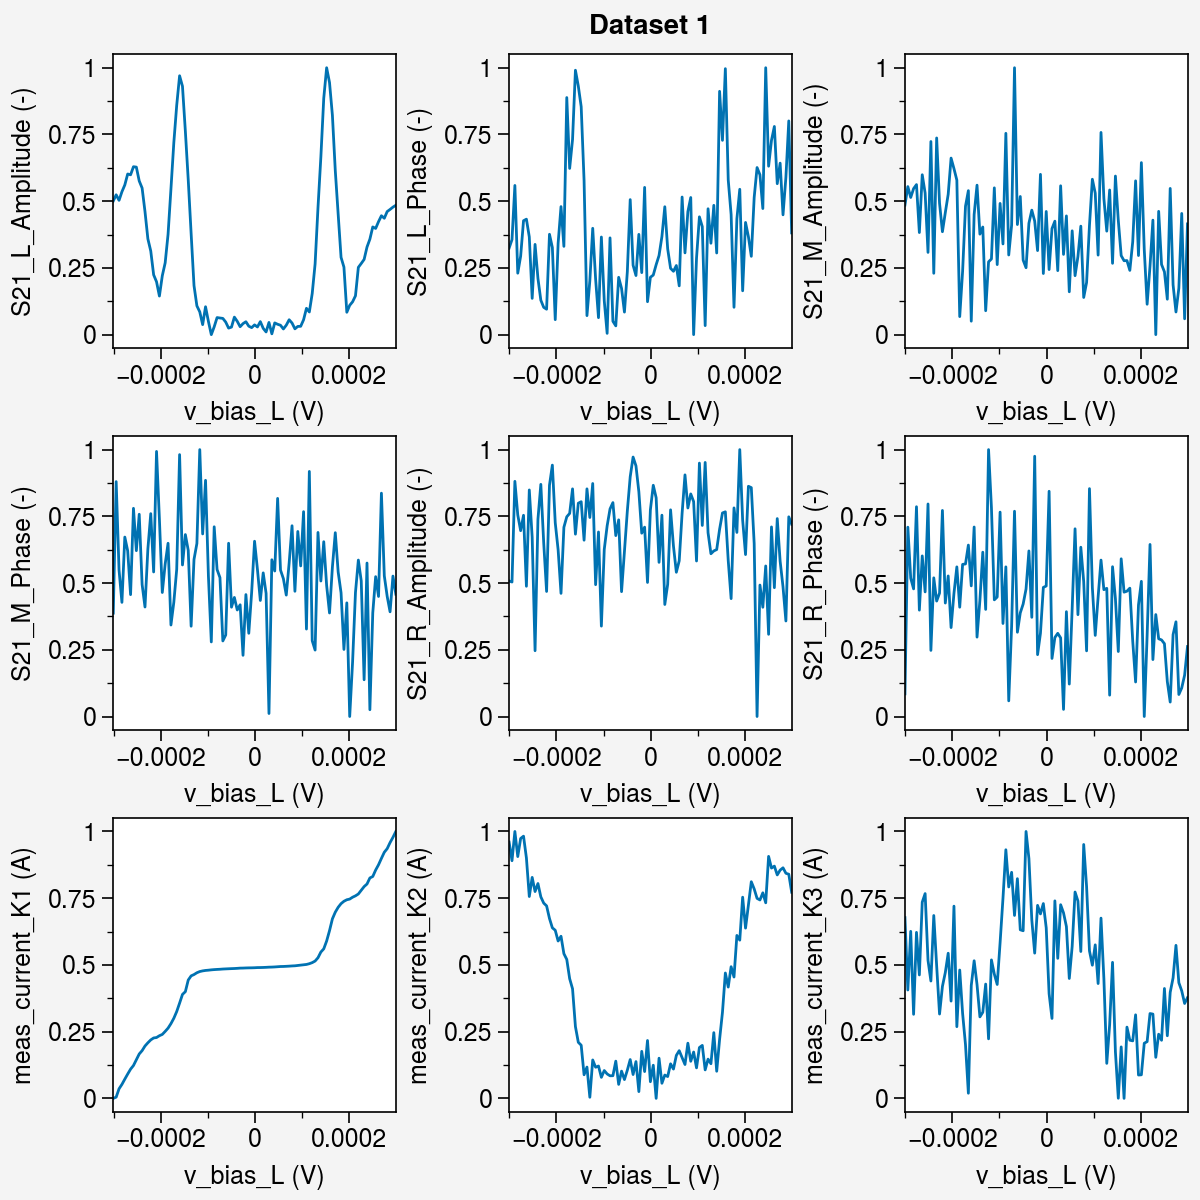

In [5]:
data = qp.DataOutput(1,reformat=False)
data.normalize()
data.show()

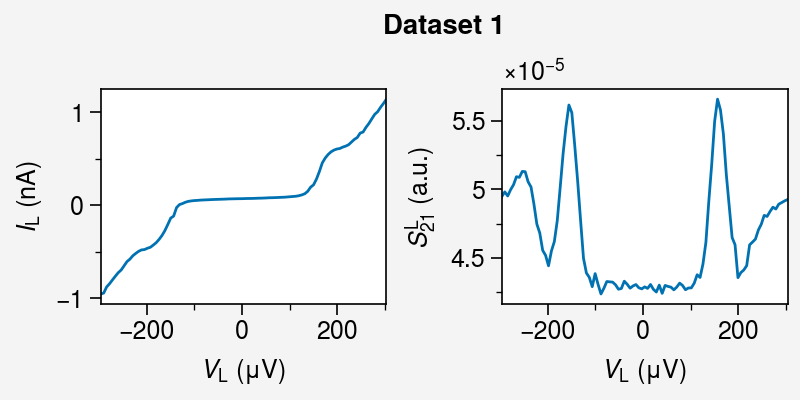

In [6]:
data = qp.DataOutput(1,['meas_current_K1','S21_L_Amplitude']) ## Select a subset of the data
data.show()

{'fig': [Figure(nrows=3, ncols=3, figwidth=6.0, figheight=6.0)],
 'axs': [SubplotGrid(nrows=3, ncols=3, length=9)]}

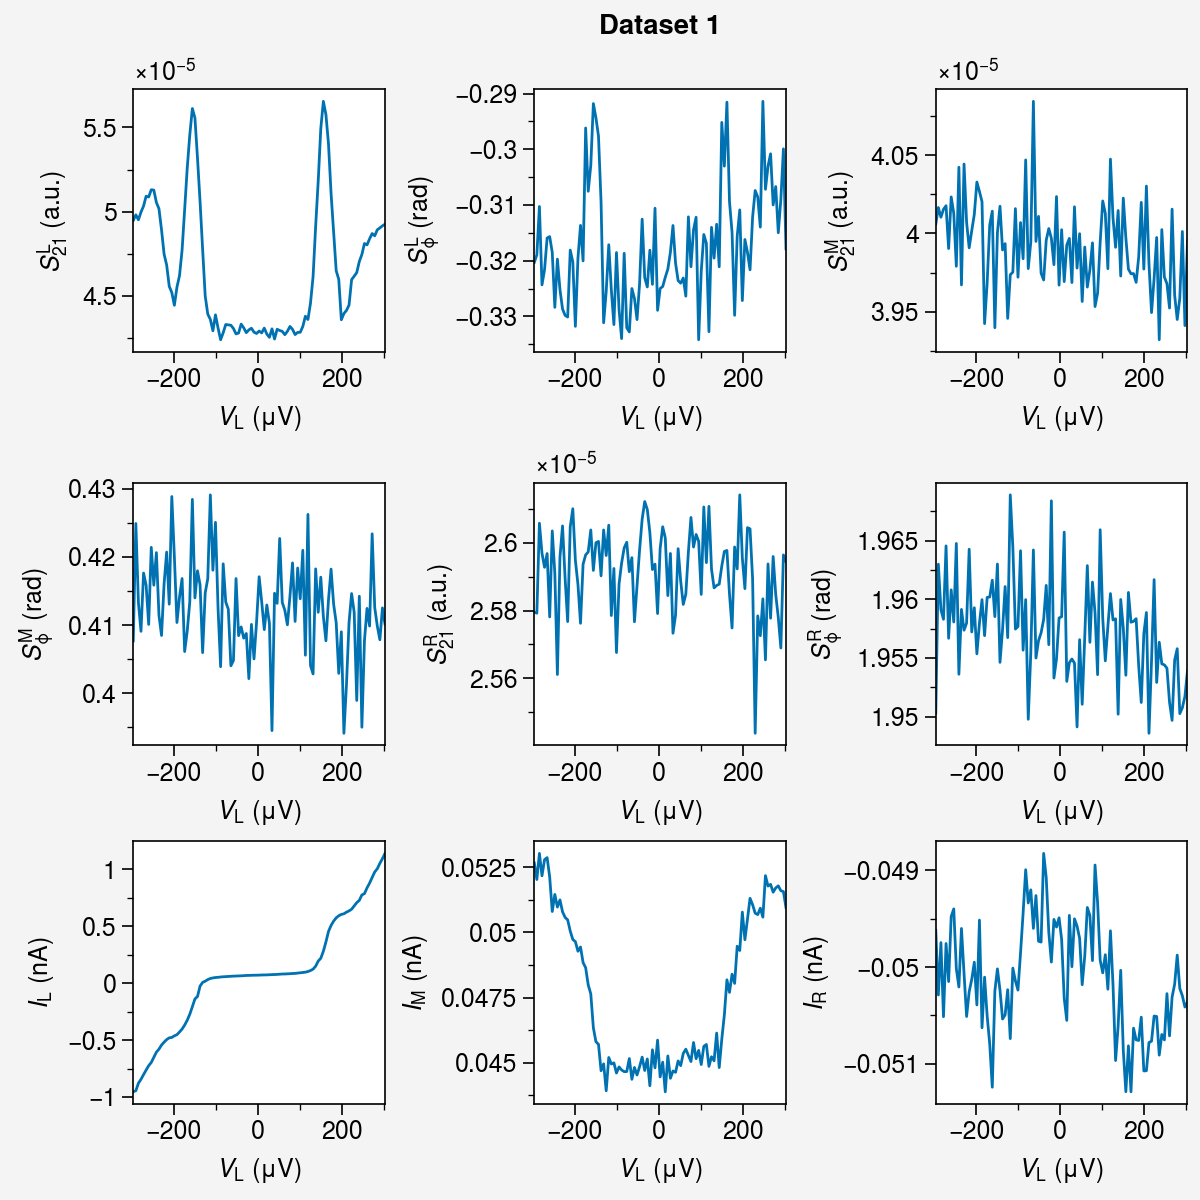

In [7]:
## Load dataset 1
data = qp.DataOutput(1)

## the show() function will attempt to automatically plot the data in the dataset
data.show()

## The output figure and axis can be accesed via:
data.plots

All parameters will automatically be loaded and saved into a json file. 

For each parameter the following can be stored:
- <b>verbose_name</b>: label to display in figures
- <b>unit</b>: correct unit after rescaling
- <b>offset</b>: linear offset to add to data (in units of the raw data)
- <b>scale</b>: scaling factor to apply to data

Upon loading data, the linear transformation will be automatically applied and the correct unit and label will be stored

In [8]:
## To show a specific parameter
qp.Parameter['v_bias_L']

$V_{\mathrm{L}}$ ($\mathrm{\mu V}$) - Scale: 1.00e+06, Offset: -4.00e-06

In [9]:
## To update a parameter call the update function:
qp.Parameter['v_bias_L'].update(verbose_name = '$V_{\\mathrm{L}}$', unit = '$\\mu V$', scale = 1e6, offset = -4e-6)

In [10]:
## Or use a jupyter widget (call update without any arguments)
qp.Parameter['v_bias_L'].update()

Text(value='$V_{\\mathrm{L}}$', description='Label')

Text(value='$\\mu V$', description='Unit')

Text(value='1000000.0', description='Scale')

Text(value='-4e-06', description='Offset')

Button(description='Save', style=ButtonStyle())

In [11]:
## updating all parameters from the dataset above:
qp.Parameter['v_bias_L'].update(verbose_name = '$V_{\\mathrm{L}}$', unit = '$\\mathrm{\\mu V}$', scale = 1e6, offset = -4e-6)
qp.Parameter['meas_current_K1'].update(verbose_name = '$I_{\\mathrm{L}}$', unit = '$\\mathrm{nA}$', scale = 1e9)
qp.Parameter['meas_current_K2'].update(verbose_name = '$I_{\\mathrm{M}}$', unit = '$\\mathrm{nA}$', scale = 1e9)
qp.Parameter['meas_current_K3'].update(verbose_name = '$I_{\\mathrm{R}}$', unit = '$\\mathrm{nA}$', scale = 1e9)


qp.Parameter['S21_L_Amplitude'].update(verbose_name = '$S^{\\mathrm{L}}_{\\mathrm{21}}$', unit = 'a.u.', scale = 1)
qp.Parameter['S21_M_Amplitude'].update(verbose_name = '$S^{\\mathrm{M}}_{\\mathrm{21}}$', unit = 'a.u.', scale = 1)
qp.Parameter['S21_R_Amplitude'].update(verbose_name = '$S^{\\mathrm{R}}_{\\mathrm{21}}$', unit = 'a.u.', scale = 1)


qp.Parameter['S21_L_Phase'].update(verbose_name = '$S^{\\mathrm{L}}_{\\mathrm{\\phi}}$', unit = 'rad', scale = 1)
qp.Parameter['S21_M_Phase'].update(verbose_name = '$S^{\\mathrm{M}}_{\\mathrm{\\phi}}$', unit = 'rad', scale = 1)
qp.Parameter['S21_R_Phase'].update(verbose_name = '$S^{\\mathrm{R}}_{\\mathrm{\\phi}}$', unit = 'rad', scale = 1)


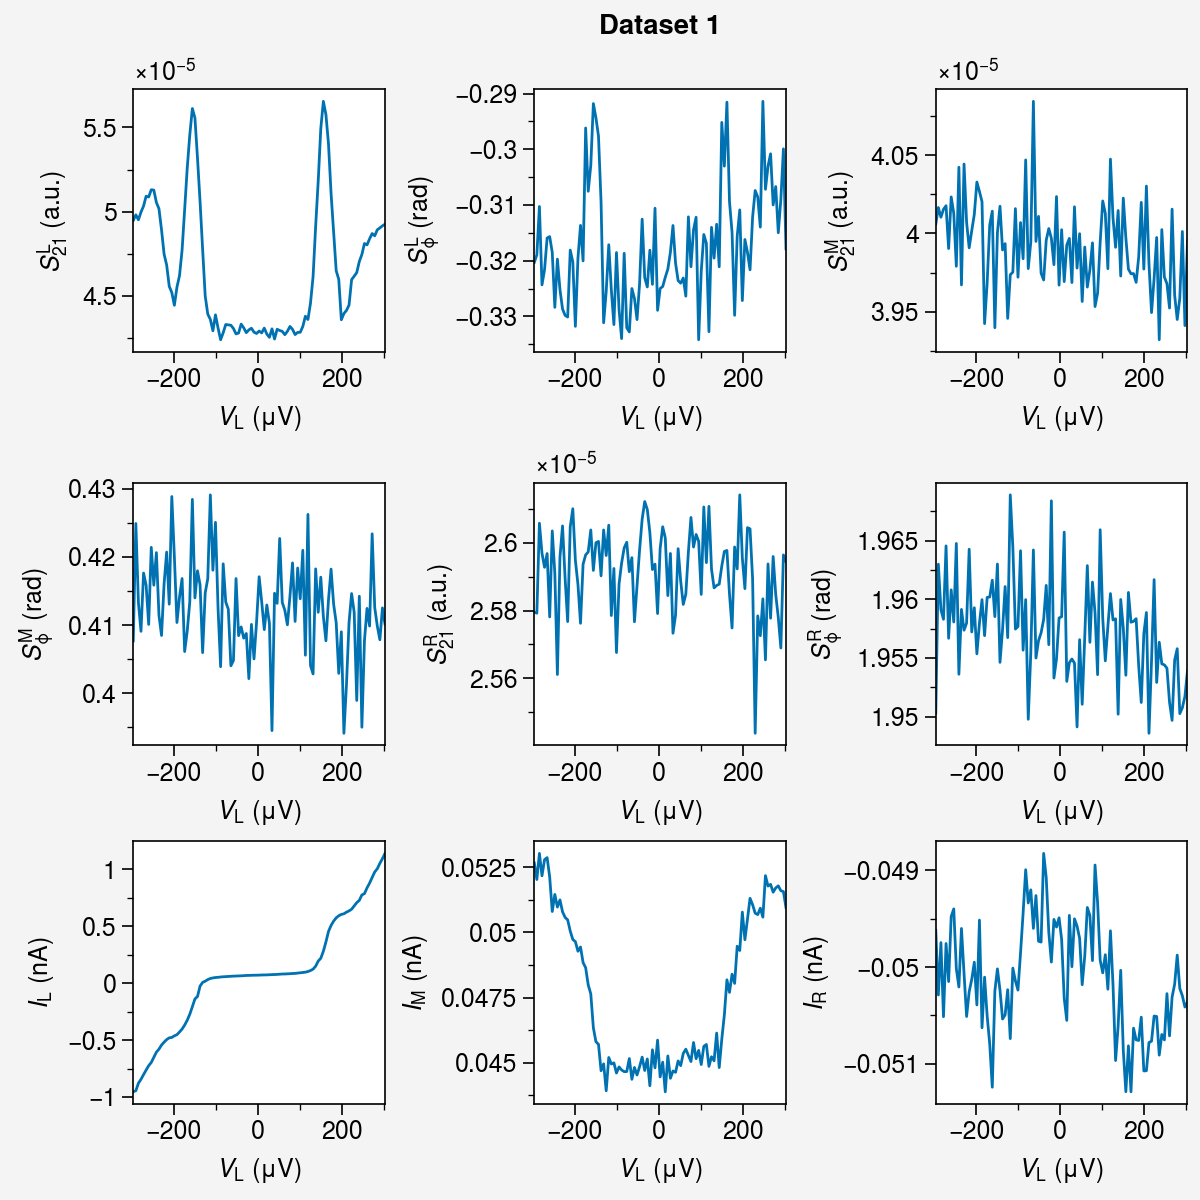

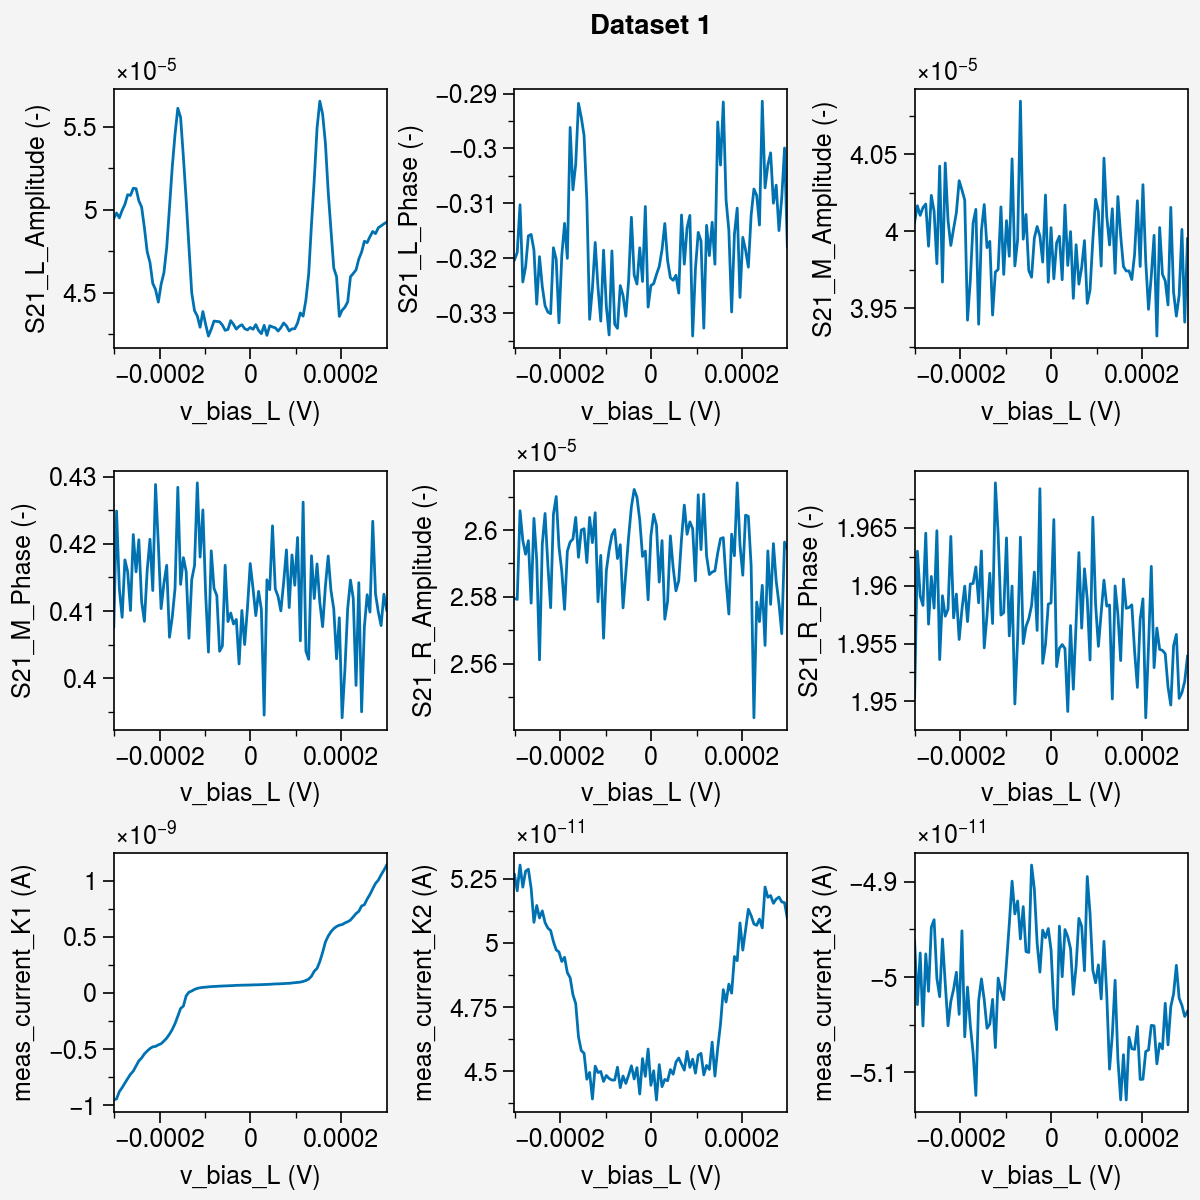

In [12]:
## Now nicely formatted
data = qp.DataOutput(1)
data.show()

## Optionally can choose to skip the formatting
data = qp.DataOutput(1,reformat=False)
data.show()

## Loading specific data variables

The first argument of DataOutput determines the datasets to load and should be:
- An integer (the run_id of a qcodes dataset)
- An xarray dataset
- A list of integers (to load multiple run_ids)
- A list of xarray datasets (to load multiple datasets)

The second argument is optional, and should contain the data variables to extract. If not specified, all data variables will be loaded.
- A string (loads a single data_var)
- A list of strings (load multiple datavars)
- A nested list of strings (load different variables in different datasets)
    -> The number of nested lists must match the number of datasets to load
    -> If a single string or single list is supplied, the same data will be loaded in each of the datasets

In [13]:
## Load dataset with id 1, extract only parameters 'S21_L_Amplitude' and 'meas_current_K1'
data = qp.DataOutput(1,['S21_L_Amplitude','meas_current_K1'] )

## The datasets are stored as attribute:
data.datasets

[<xarray.Dataset> Size: 2kB
 Dimensions:          (v_bias_L: 99)
 Coordinates:
   * v_bias_L         (v_bias_L) float64 792B -296.6 -290.5 ... 297.3 303.4
 Data variables:
     S21_L_Amplitude  (v_bias_L) float64 792B 4.948e-05 4.981e-05 ... 4.925e-05
     meas_current_K1  (v_bias_L) float64 792B -0.9544 -0.9447 ... 1.095 1.141
 Attributes: (12/14)
     ds_name:                  results
     sample_name:              BRA
     exp_name:                 1D Sweep v_bias_L --Biases = [L:-300.6, M:21.67...
     snapshot:                 {"station": {"instruments": {"ivvi": {"function...
     guid:                     aaaaaaaa-0000-0000-0000-018e6b430761
     run_timestamp:            2024-03-23 13:22:18
     ...                       ...
     captured_counter:         1
     run_id:                   1
     run_description:          {"version": 3, "interdependencies": {"paramspec...
     parent_dataset_links:     []
     run_timestamp_raw:        1711196538.7689714
     completed_timestamp_

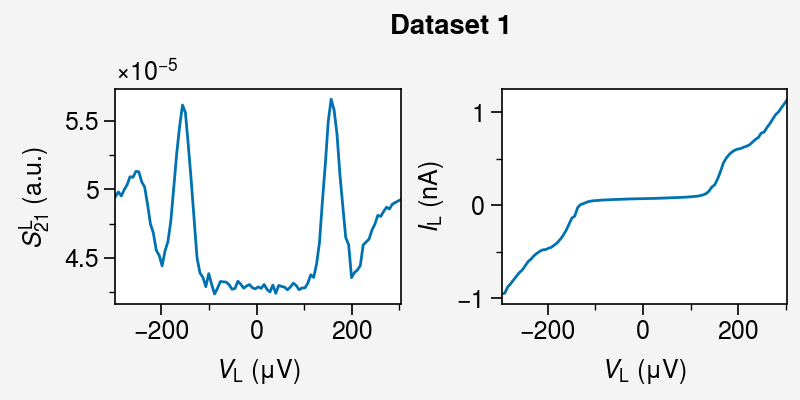

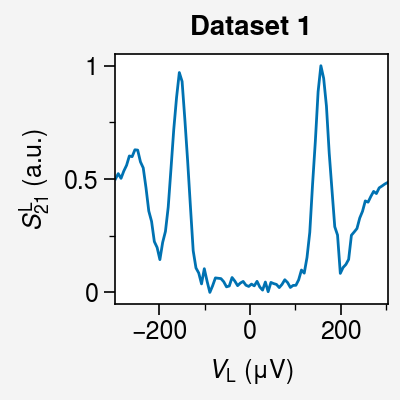

In [14]:
# Specific variables can also be selected after loading the data:
data = qp.DataOutput([1],[['S21_L_Amplitude','meas_current_K1']] )
data.show()

## Post-select 'S21_L_Amplitude'
## (This way of getting creates a new DataOutput object with a subsection of the data
subsection = data['S21_L_Amplitude']
subsection.normalize()
subsection.show()


## Working with xarray datasets directly

In [15]:
import xarray as xr

In [16]:
ds = xr.open_dataset('_xarray_dataset.nc')
output = qp.DataOutput(ds)

In [17]:
## Update a bunch of parameter data
qp.Parameter['bias_0'].update(verbose_name = '$V_{\\mathrm{L}}$', scale= 1000, unit='$\\mathrm{\\mu V}$')
qp.Parameter['bias_1'].update(verbose_name = '$V_{\\mathrm{M}}$', scale= 1000, unit='$\\mathrm{\\mu V}$')
qp.Parameter['bias_2'].update(verbose_name = '$V_{\\mathrm{R}}$', scale= 1000, unit='$\\mathrm{\\mu V}$')
qp.Parameter['G_00'].update(verbose_name = '$G_{\\mathrm{LL}}$', scale= 1, unit='$2e^2/h$')
qp.Parameter['G_11'].update(verbose_name = '$G_{\\mathrm{MM}}$', scale= 1, unit='$2e^2/h$')
qp.Parameter['G_22'].update(verbose_name = '$G_{\\mathrm{RR}}$', scale= 1, unit='$2e^2/h$')
qp.Parameter['G_01'].update(verbose_name = '$G_{\\mathrm{LM}}$', scale= 1, unit='$2e^2/h$')
qp.Parameter['G_02'].update(verbose_name = '$G_{\\mathrm{LR}}$', scale= 1, unit='$2e^2/h$')
qp.Parameter['G_10'].update(verbose_name = '$G_{\\mathrm{ML}}$', scale= 1, unit='$2e^2/h$')
qp.Parameter['G_12'].update(verbose_name = '$G_{\\mathrm{MR}}$', scale= 1, unit='$2e^2/h$')
qp.Parameter['G_20'].update(verbose_name = '$G_{\\mathrm{RL}}$', scale= 1, unit='$2e^2/h$')
qp.Parameter['G_21'].update(verbose_name = '$G_{\\mathrm{RM}}$', scale= 1, unit='$2e^2/h$')

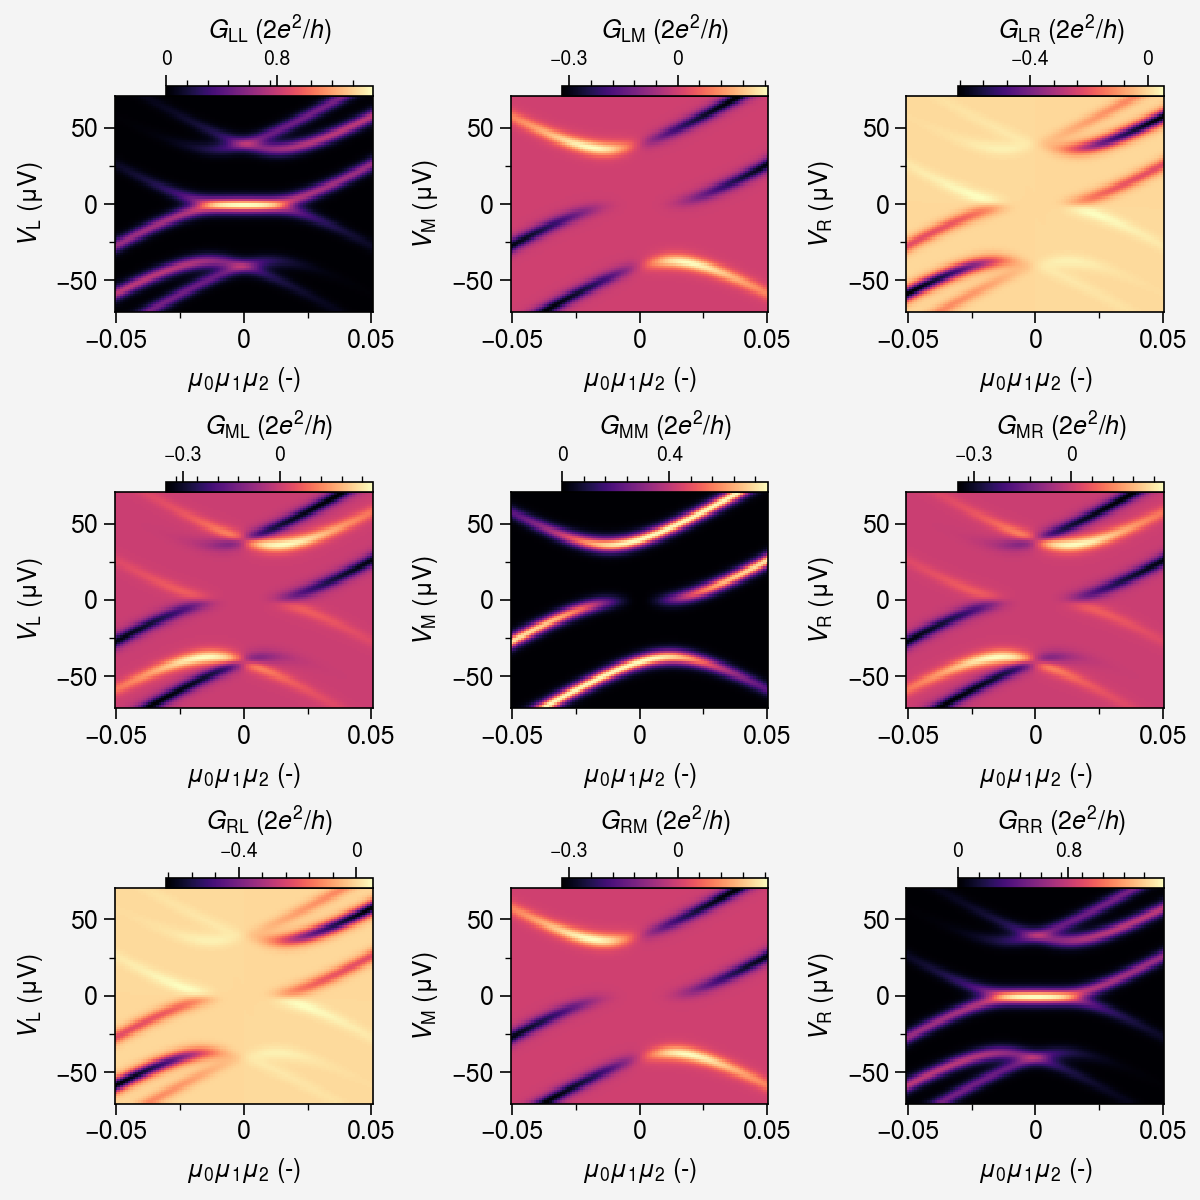

In [18]:
ds = xr.open_dataset('_xarray_dataset.nc')
output = qp.DataOutput(ds)
output.show()

# Customizable Plotting & Processing

In addition to the auto-plotting, custom plotting and processing functions can be added. 

A few default options are included:


<b> Included processing attributes</b>
- normalize() -> rescales all datavariables between 0 and 1
- transpose() -> calls xarrays transpose function on each dataset
- select() -> calls xarrays .sel() function on each dataset

<b> Included plotting attributes</b>
- pcolormesh() -> calls pcolormesh for each data variable
- colorbar () -> adds a colorbar to each axs (assumes pcolormesh has been called previously)

## Processing functions

Any function in the _processing file can be called as an attribute on the DataOutput objects

The object itself will be automatically passed to any of those functions, in which the data can then be manipulated through accessing the object.datasets

Additional **kwargs will be passed along as well


In [19]:
qp.Parameter['v_bias_R'].update()

Text(value='$V_{\\mathrm{R}}$', description='Label')

Text(value='$\\mathrm{\\mu V}$', description='Unit')

Text(value='1000000.0', description='Scale')

Text(value='-3.7e-05', description='Offset')

Button(description='Save', style=ButtonStyle())

Locator attempting to generate 1001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


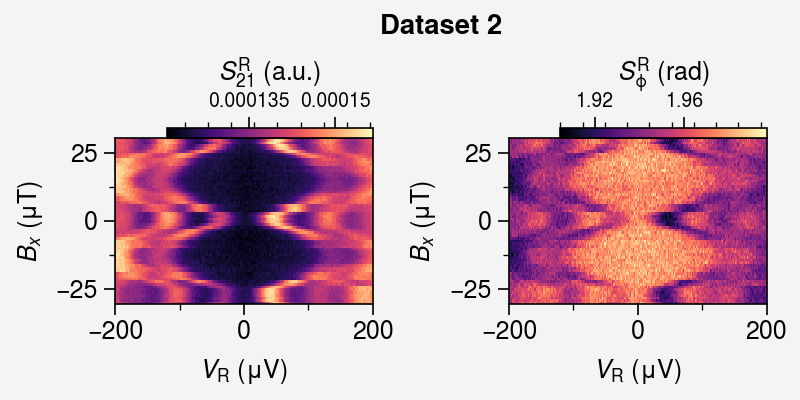

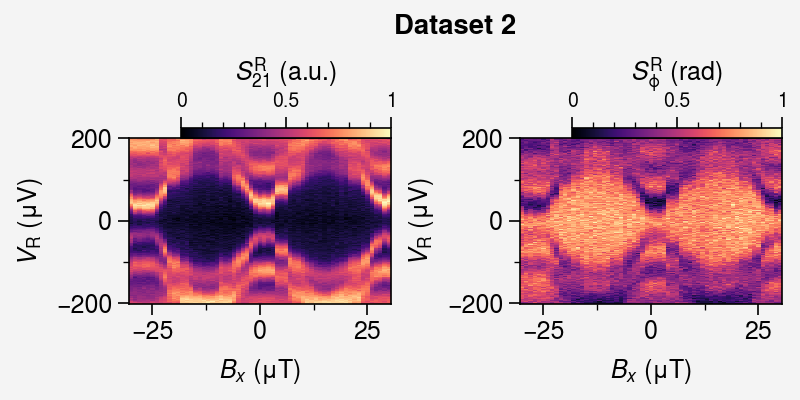

In [20]:
data = qp.DataOutput([2])
## Show the data
data.show()

## Transpose and normalize the data, then show
data.transpose()
data.normalize()
data.show()

### Adding processes

For convenience, custom functions can be written in jupyter and added to the file from there, to speed up testing without having to jump back and forth between files

In [21]:
## EXAMPLE: Adding a 'multiplty' process:

## The first argument will ALWAYS automatically be the DataOutput object on which you call the function
def multiply(data_output: 'DataOutput' , multiplier: int):

    ## Loop over all datasets
    for idx,dataset in enumerate(data_output.datasets):
        new_dataset = dataset*multiplier

        ## Override the old dataset with the new dataset
        data_output.datasets[idx] = new_dataset

## Save the new function to the _processing file
qp.save_process(multiply)

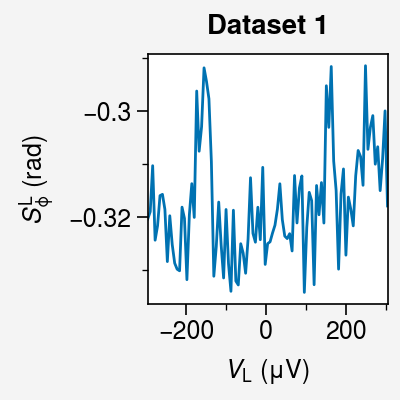

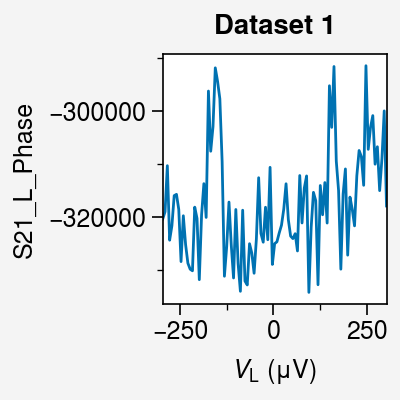

In [22]:
## The added process can immediately be used!
data = qp.DataOutput([1], [['S21_L_Phase']])
data.show()
data.multiply(1000000)
data.show()

## Plotting functions

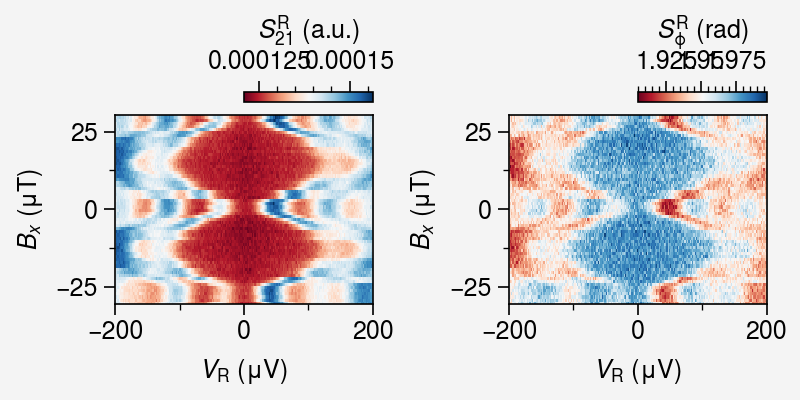

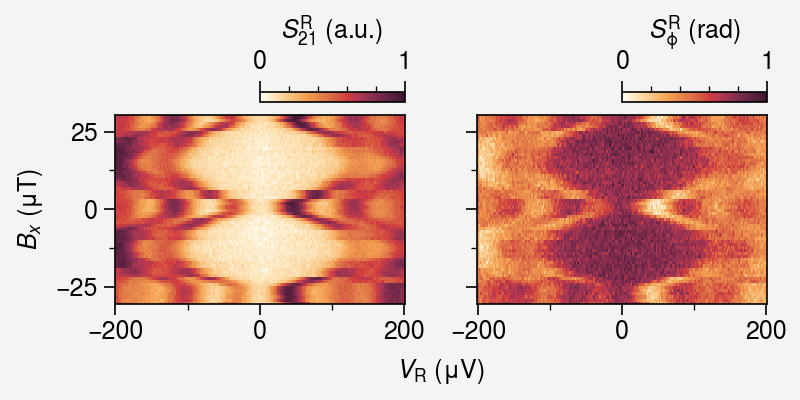

In [23]:
data = qp.DataOutput(2)
## For the default plotting functions: if you do not pass a fig and axs argument, they will be created automatically
## This behavior is defined by the 'add_fig_and_axes_if_not_passed' decorator in the _plotting file

## Call pcolormesh on all data, pass along arguments (but no fig,axs)
data.pcolormesh(cmap = 'Rdbu')
## Add a colorbar
data.colorbar(length = 0.5,align='right',location='top')

## It is also possible to create the fig and axs outside and pass them along
import ultraplot as pplt
fig,axs = pplt.subplots(ncols = 2, figwidth  = 4, figheight = 2)
data = qp.DataOutput(2)
data.normalize()
data.pcolormesh(fig=fig,axs=axs)
data.colorbar(length = 0.5,align='right',location='top')


### Adding plotting options

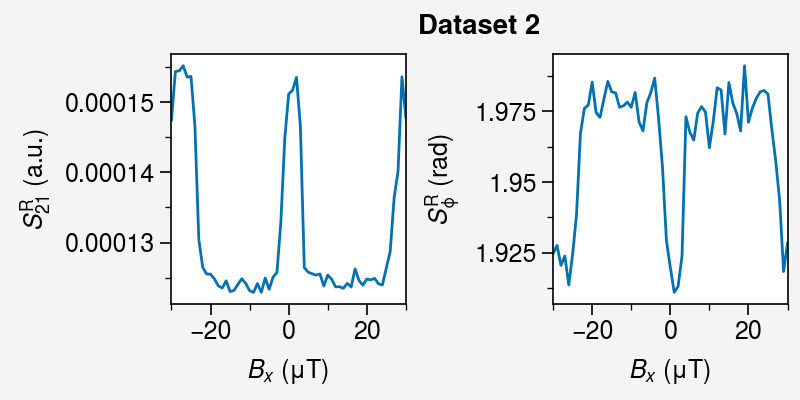

In [31]:
data = qp.DataOutput(2)
data.select({'v_bias_R':40})
data.show()